In [70]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import plotly.express as px



In [71]:
df = pd.read_csv("Data KP Gempa Bumi Wilayah Sumatera Selatan Dan Sekitarnya.csv")
df

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.40,Kotabumi
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.90,Bengkulu
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.50,kotabumi
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.20,Pagar Alam
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.90,Kotabumi
...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,12:31:43,-4.3380,102.5970,35.000,6.71,Bengkulu
2808,14,7,1914,3:10:26,-5.3050,102.5790,30.000,6.32,Pagar Alam
2809,25,6,1914,19:07:25,-4.0120,101.6380,35.000,7.55,Bengkulu
2810,3,6,1909,18:40:43,-2.7130,101.1880,35.000,7.58,Sungai Penuh


In [72]:
df1 = pd.DataFrame ((df),
columns = ['Mag'])
df.loc [df1['Mag'] >= 5.0, 'Intensitas Gempa'] = 'Berat'
df.loc [df1['Mag'] < 5.0, 'Intensitas Gempa'] = 'Tidak Berat'
df

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place,Intensitas Gempa
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.40,Kotabumi,Tidak Berat
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.90,Bengkulu,Tidak Berat
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.50,kotabumi,Tidak Berat
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.20,Pagar Alam,Tidak Berat
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.90,Kotabumi,Tidak Berat
...,...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,12:31:43,-4.3380,102.5970,35.000,6.71,Bengkulu,Berat
2808,14,7,1914,3:10:26,-5.3050,102.5790,30.000,6.32,Pagar Alam,Berat
2809,25,6,1914,19:07:25,-4.0120,101.6380,35.000,7.55,Bengkulu,Berat
2810,3,6,1909,18:40:43,-2.7130,101.1880,35.000,7.58,Sungai Penuh,Berat


In [73]:
df['Intensitas Gempa'].replace({'Tidak Berat': 0, 'Berat': 1},inplace = True)

df

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place,Intensitas Gempa
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.40,Kotabumi,0
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.90,Bengkulu,0
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.50,kotabumi,0
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.20,Pagar Alam,0
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.90,Kotabumi,0
...,...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,12:31:43,-4.3380,102.5970,35.000,6.71,Bengkulu,1
2808,14,7,1914,3:10:26,-5.3050,102.5790,30.000,6.32,Pagar Alam,1
2809,25,6,1914,19:07:25,-4.0120,101.6380,35.000,7.55,Bengkulu,1
2810,3,6,1909,18:40:43,-2.7130,101.1880,35.000,7.58,Sungai Penuh,1


In [74]:
X = df.iloc [:,:-3].values
X

array([[4, 10, 2022, ..., -4.9967, 104.2793, 112.997],
       [1, 10, 2022, ..., -3.8325, 101.8353, 60.652],
       [29, 9, 2022, ..., -5.4541, 102.6805, 37.099],
       ...,
       [25, 6, 1914, ..., -4.012, 101.638, 35.0],
       [3, 6, 1909, ..., -2.713, 101.188, 35.0],
       [28, 10, 1906, ..., -4.345, 101.985, 60.0]], dtype=object)

In [91]:
X = df.drop(['Time','Place','Mag','Intensitas Gempa'],axis=1)
X

,Day,Month,Years,Latitude,Longitude,Depth
0,4,10,2022,-4.9967,104.2793,112.997
1,1,10,2022,-3.8325,101.8353,60.652
2,29,9,2022,-5.4541,102.6805,37.099
3,19,9,2022,-5.5071,102.8860,38.085
4,13,9,2022,-5.6133,104.1844,96.048
...,...,...,...,...,...,...
2807,15,4,1916,-4.3380,102.5970,35.000
2808,14,7,1914,-5.3050,102.5790,30.000
2809,25,6,1914,-4.0120,101.6380,35.000
2810,3,6,1909,-2.7130,101.1880,35.000


In [94]:
y =df.iloc[: ,9]
y

0       0
1       0
2       0
3       0
4       0
       ..
2807    1
2808    1
2809    1
2810    1
2811    1
Name: Intensitas Gempa, Length: 2812, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((2109, 6), (703, 6))

In [96]:
y_train.shape, y_test.shape

((2109,), (703,))

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

t0=time.time()
clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features=None, random_state=None, max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy :',score)
print('Time taken :' , time.time()-t0)

accuracy : 0.7738264580369844
Time taken : 0.01725292205810547


In [98]:
y_test

546     1
333     0
70      0
2313    0
118     0
       ..
1760    0
59      0
2004    1
1051    1
414     0
Name: Intensitas Gempa, Length: 703, dtype: int64

In [99]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[481  21]
 [138  63]]


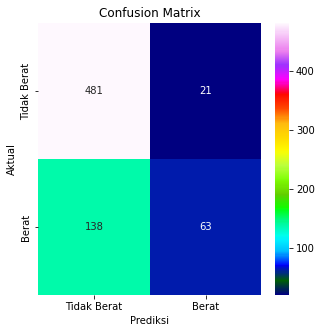

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,
                     index = ['Tidak Berat','Berat'], 
                     columns = ['Tidak Berat','Berat'])

fig, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt=".0f", ax=ax ,cmap="gist_ncar")
plt.title('Confusion Matrix')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.savefig('plot_confusion_matrix.png')
plt.show()

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       502
           1       0.75      0.31      0.44       201

    accuracy                           0.77       703
   macro avg       0.76      0.64      0.65       703
weighted avg       0.77      0.77      0.74       703

